In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving yelp.csv to yelp.csv


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
yelp = pd.read_csv('yelp.csv')
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Create a new Column called "text length" which is the number of words in the text columns

In [ ]:
yelp['text length'] = yelp['text'].apply(len)

Task 1: Lets Start with EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


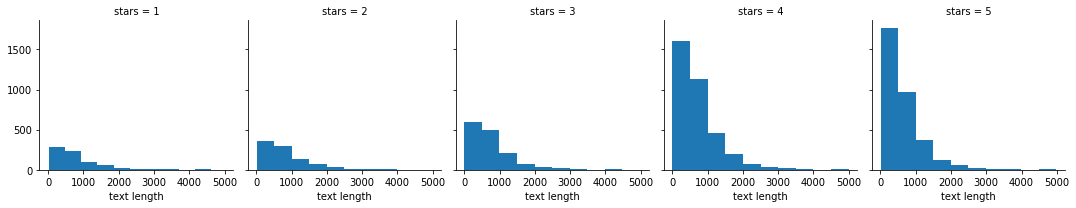

In [ ]:
test = sns.FacetGrid(yelp,col='stars')
test.map(plt.hist,'text length')

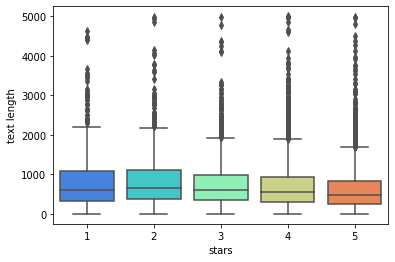

In [ ]:
sns.boxplot(x='stars',y='text length' , data = yelp , palette='rainbow')

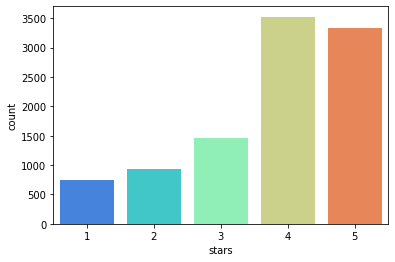

In [ ]:
sns.countplot(x='stars', data = yelp , palette='rainbow')

How to Get the Mean Values of the Dataset Which Containing Unique Features Like Star 1, Star 2, Star 3....Star 5

In [ ]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [ ]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


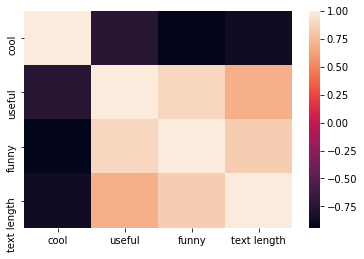

In [ ]:
sns.heatmap(stars.corr())

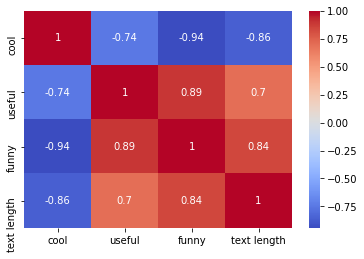

In [ ]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

NLP Classification Task 

In [ ]:
# Lets Try to Create a dataframe called yelp_class that will contain the columns of yelp dataframe but only for the 1 or 5

In [ ]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

Lets Try to Create two Objects X and y will be column 'yelp_class'

In [ ]:
X = yelp_class['text']
y= yelp_class['stars']

Imporr CounterVectorizer and We have to create a CountVectorizer Object- Feature Engineering 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() # Similar to Linear Model = lm = LienarRegression()

In [ ]:
X = cv.fit_transform(X) # Use the fit_transform method on the CountVectorizer object and pass it with X and Save the Modified Result

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train

<2860x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 221059 stored elements in Compressed Sparse Row format>

In [ ]:
# We have to Prepare Train Model - To Resolve the Problem We have to Import MultinominalNB and Crate an Instance of Estimator and You May
# Call as "nb" (BAYES)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Lets Try to Find Out Predcitions & Evaluations

In [ ]:
predictions = nb.predict(X_test)

Lets Find Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('\n')

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226





TF-IDF Transformer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
                     ('bow',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB()),
])

In [ ]:
X= yelp_class['text']
y= yelp_class['stars']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=101)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 207]
 [  0 938]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       207
           5       0.82      1.00      0.90       938

    accuracy                           0.82      1145
   macro avg       0.41      0.50      0.45      1145
weighted avg       0.67      0.82      0.74      1145



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After Implementation of TF-IDF Transformer Situation Become More Worse